In [210]:
import nltk
import pandas as pd 
import numpy as np

In [211]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [212]:
df1=pd.read_csv('tweets.csv')

/var/folders/6p/qjy8_4c14_s30rxq1s3hxcg40000gn/T/ipykernel_1354/783313125.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('tweets.csv')


In [213]:
df1.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1


In [214]:
df1.columns

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

In [215]:
df1.shape

(3412811, 12)

In [216]:
df1=df1[0:500]

In [217]:
df1.shape

(500, 12)

In [218]:
df2=df1['text']

In [219]:
df2

0      #GPT4 for FREE. \nNo its not a clickbait, @Qol...
1                                          AI enthusiast
2      ChatGPT Thinks These 5 Crypto Coins Will Explo...
3      New: @JWVance's post about 5 #startups (includ...
4      🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
                             ...                        
495    #ChatGPT set off an endless stream of fear and...
496    ChatGPT is a hot topic; there is no doubt. It ...
497    Exciting news! #chatGPT has launched its Plugi...
498    @Oncrawl Agreed! The #ChatGPT is definitely th...
499    Do you agree whatever is put on the internet d...
Name: text, Length: 500, dtype: object

In [220]:
# keep first duplicate row
df2= df2.drop_duplicates()

In [221]:
df2.shape

(496,)

In [222]:
df2.isnull().sum()

0

In [223]:
#remove rows with missing values
df1 = df1.dropna()

In [224]:
df1.isnull().sum()

user_name           0
text                0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
hashtags            0
source              0
dtype: int64

# Sentence Tokenization

In [227]:
sen_token=[]
for i in df2:
    sen_token.append(sent_tokenize(i))

In [228]:
sen_token

[['#GPT4 for FREE.',
  'No its not a clickbait, @Qolaba Studio now has a chatbot powered by #ChatGPT4 offering #ChatGPTplus for FREE to use along with #AIart generator which allows you a 1-click #NFT #minting to make the most of your #AIArtwork \n#NFTs #OpenAI #OpenAIChatGPT  #chatgpt'],
 ['AI enthusiast'],
 ['ChatGPT Thinks These 5 Crypto Coins Will Explode This Year - Yahoo Finance #chatgpt #AI #openAI https://t.co/tFOdU0qnDz'],
 ["New: @JWVance's post about 5 #startups (including @VcinityInc) that won the 1st #startup50 challenge (thx to #ChatGPT), based on answers about macro-economic pressures, VC funding, track record of management team &amp; growth potential of the market sector.",
  'https://t.co/JXG37AMjh5'],
 ['🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation: #Short 🔴\nTicker:  #GHSTUSDT\nTime Interval:  5min\nLast Price: 0.956\n🔴 RSI: 88.3\n\nPowered by #ChatGPT\n\n$GHST\n#GHST\n#AlphaQuarkToken\n#저스트\n\nWhat are you gonna do?',
  '👇LONG        👇WAIT         👇SHORT https://t.c

# Word Tokeniztion 

In [229]:
word_token=[]
for i in df2:
    word_token.append(word_tokenize(i))

In [230]:
word_token

[['#',
  'GPT4',
  'for',
  'FREE',
  '.',
  'No',
  'its',
  'not',
  'a',
  'clickbait',
  ',',
  '@',
  'Qolaba',
  'Studio',
  'now',
  'has',
  'a',
  'chatbot',
  'powered',
  'by',
  '#',
  'ChatGPT4',
  'offering',
  '#',
  'ChatGPTplus',
  'for',
  'FREE',
  'to',
  'use',
  'along',
  'with',
  '#',
  'AIart',
  'generator',
  'which',
  'allows',
  'you',
  'a',
  '1-click',
  '#',
  'NFT',
  '#',
  'minting',
  'to',
  'make',
  'the',
  'most',
  'of',
  'your',
  '#',
  'AIArtwork',
  '#',
  'NFTs',
  '#',
  'OpenAI',
  '#',
  'OpenAIChatGPT',
  '#',
  'chatgpt'],
 ['AI', 'enthusiast'],
 ['ChatGPT',
  'Thinks',
  'These',
  '5',
  'Crypto',
  'Coins',
  'Will',
  'Explode',
  'This',
  'Year',
  '-',
  'Yahoo',
  'Finance',
  '#',
  'chatgpt',
  '#',
  'AI',
  '#',
  'openAI',
  'https',
  ':',
  '//t.co/tFOdU0qnDz'],
 ['New',
  ':',
  '@',
  'JWVance',
  "'s",
  'post',
  'about',
  '5',
  '#',
  'startups',
  '(',
  'including',
  '@',
  'VcinityInc',
  ')',
  'that',
 

# Filteration

In [231]:
filtration=[]
for lists in word_token:
    for words in lists:
        filtration.append(words.lower())

In [232]:
filtration

['#',
 'gpt4',
 'for',
 'free',
 '.',
 'no',
 'its',
 'not',
 'a',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'now',
 'has',
 'a',
 'chatbot',
 'powered',
 'by',
 '#',
 'chatgpt4',
 'offering',
 '#',
 'chatgptplus',
 'for',
 'free',
 'to',
 'use',
 'along',
 'with',
 '#',
 'aiart',
 'generator',
 'which',
 'allows',
 'you',
 'a',
 '1-click',
 '#',
 'nft',
 '#',
 'minting',
 'to',
 'make',
 'the',
 'most',
 'of',
 'your',
 '#',
 'aiartwork',
 '#',
 'nfts',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'ai',
 'enthusiast',
 'chatgpt',
 'thinks',
 'these',
 '5',
 'crypto',
 'coins',
 'will',
 'explode',
 'this',
 'year',
 '-',
 'yahoo',
 'finance',
 '#',
 'chatgpt',
 '#',
 'ai',
 '#',
 'openai',
 'https',
 ':',
 '//t.co/tfodu0qndz',
 'new',
 ':',
 '@',
 'jwvance',
 "'s",
 'post',
 'about',
 '5',
 '#',
 'startups',
 '(',
 'including',
 '@',
 'vcinityinc',
 ')',
 'that',
 'won',
 'the',
 '1st',
 '#',
 'startup50',
 'challenge',
 '(',
 'thx',
 'to',
 '#',
 'chatgpt',
 ')'

# Stop Word Removel

In [233]:
stops_words=nltk.corpus.stopwords.words()
stop_word_removel=[i for i in filtration if i not in stops_words]

In [234]:
stop_word_removel

['#',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 '#',
 'chatgpt4',
 'offering',
 '#',
 'chatgptplus',
 'free',
 '#',
 'aiart',
 'generator',
 '1-click',
 '#',
 'nft',
 '#',
 'minting',
 'make',
 '#',
 'aiartwork',
 '#',
 'nfts',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'thinks',
 '5',
 'crypto',
 'coins',
 'explode',
 'year',
 '-',
 'yahoo',
 'finance',
 '#',
 'chatgpt',
 '#',
 '#',
 'openai',
 'https',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '@',
 'jwvance',
 "'s",
 'post',
 '5',
 '#',
 'startups',
 '(',
 'including',
 '@',
 'vcinityinc',
 ')',
 '1st',
 '#',
 'startup50',
 'challenge',
 '(',
 'thx',
 '#',
 'chatgpt',
 ')',
 ',',
 'based',
 'answers',
 'macro-economic',
 'pressures',
 ',',
 'vc',
 'funding',
 ',',
 'track',
 'record',
 'management',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potential',
 'market',
 'sector',
 '.',
 'https',
 ':',
 '//t.co/jxg37amjh5',
 '🚨get',
 '!',
 '🚨',
 '💰'

# Stemming 

In [235]:
stemmer=PorterStemmer()
stemming=[stemmer.stem(i) for i in stop_word_removel]

In [236]:
stemming

['#',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'chatbot',
 'power',
 '#',
 'chatgpt4',
 'offer',
 '#',
 'chatgptplu',
 'free',
 '#',
 'aiart',
 'gener',
 '1-click',
 '#',
 'nft',
 '#',
 'mint',
 'make',
 '#',
 'aiartwork',
 '#',
 'nft',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'think',
 '5',
 'crypto',
 'coin',
 'explod',
 'year',
 '-',
 'yahoo',
 'financ',
 '#',
 'chatgpt',
 '#',
 '#',
 'openai',
 'http',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '@',
 'jwvanc',
 "'s",
 'post',
 '5',
 '#',
 'startup',
 '(',
 'includ',
 '@',
 'vcinityinc',
 ')',
 '1st',
 '#',
 'startup50',
 'challeng',
 '(',
 'thx',
 '#',
 'chatgpt',
 ')',
 ',',
 'base',
 'answer',
 'macro-econom',
 'pressur',
 ',',
 'vc',
 'fund',
 ',',
 'track',
 'record',
 'manag',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potenti',
 'market',
 'sector',
 '.',
 'http',
 ':',
 '//t.co/jxg37amjh5',
 '🚨get',
 '!',
 '🚨',
 '💰',
 '#',
 'binanc',
 'spot💰',
 '⬇',
 'recom

# Lemmatization

In [237]:
lemmatizer = WordNetLemmatizer()
lemmatizer=[lemmatizer.lemmatize(i) for i in stop_word_removel]

In [238]:
lemmatizer

['#',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 '#',
 'chatgpt4',
 'offering',
 '#',
 'chatgptplus',
 'free',
 '#',
 'aiart',
 'generator',
 '1-click',
 '#',
 'nft',
 '#',
 'minting',
 'make',
 '#',
 'aiartwork',
 '#',
 'nfts',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'think',
 '5',
 'crypto',
 'coin',
 'explode',
 'year',
 '-',
 'yahoo',
 'finance',
 '#',
 'chatgpt',
 '#',
 '#',
 'openai',
 'http',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '@',
 'jwvance',
 "'s",
 'post',
 '5',
 '#',
 'startup',
 '(',
 'including',
 '@',
 'vcinityinc',
 ')',
 '1st',
 '#',
 'startup50',
 'challenge',
 '(',
 'thx',
 '#',
 'chatgpt',
 ')',
 ',',
 'based',
 'answer',
 'macro-economic',
 'pressure',
 ',',
 'vc',
 'funding',
 ',',
 'track',
 'record',
 'management',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potential',
 'market',
 'sector',
 '.',
 'http',
 ':',
 '//t.co/jxg37amjh5',
 '🚨get',
 '!',
 '🚨',
 '💰',
 '#',

# Removing Punctuation

In [239]:
import string
import re
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [241]:
punctuation_remove = [''.join(char for char in item
                    if char not in string.punctuation)
            for item in df2 if item != '']

print(punctuation_remove) 

['GPT4 for FREE \nNo its not a clickbait Qolaba Studio now has a chatbot powered by ChatGPT4 offering ChatGPTplus for FREE to use along with AIart generator which allows you a 1click NFT minting to make the most of your AIArtwork \nNFTs OpenAI OpenAIChatGPT  chatgpt', 'AI enthusiast', 'ChatGPT Thinks These 5 Crypto Coins Will Explode This Year  Yahoo Finance chatgpt AI openAI httpstcotFOdU0qnDz', 'New JWVances post about 5 startups including VcinityInc that won the 1st startup50 challenge thx to ChatGPT based on answers about macroeconomic pressures VC funding track record of management team amp growth potential of the market sector  httpstcoJXG37AMjh5', '🚨Get Out🚨\n💰Binance Spot💰\n⬇ Recommendation Short 🔴\nTicker  GHSTUSDT\nTime Interval  5min\nLast Price 0956\n🔴 RSI 883\n\nPowered by ChatGPT\n\nGHST\nGHST\nAlphaQuarkToken\n저스트\n\nWhat are you gonna do\n👇LONG        👇WAIT         👇SHORT httpstcoQIqgtT11Aa', 'Caught in the web of the digital age we all could use a superhero What if tha

# URL Removel

In [242]:
# Replacing URL by words (URL) in original Text
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Remove URLs from the tweets
new_list = [url_pattern.sub("URL", s) for s in stop_word_removel]

In [243]:
new_list

['#',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 '#',
 'chatgpt4',
 'offering',
 '#',
 'chatgptplus',
 'free',
 '#',
 'aiart',
 'generator',
 '1-click',
 '#',
 'nft',
 '#',
 'minting',
 'make',
 '#',
 'aiartwork',
 '#',
 'nfts',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'thinks',
 '5',
 'crypto',
 'coins',
 'explode',
 'year',
 '-',
 'yahoo',
 'finance',
 '#',
 'chatgpt',
 '#',
 '#',
 'openai',
 'https',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '@',
 'jwvance',
 "'s",
 'post',
 '5',
 '#',
 'startups',
 '(',
 'including',
 '@',
 'vcinityinc',
 ')',
 '1st',
 '#',
 'startup50',
 'challenge',
 '(',
 'thx',
 '#',
 'chatgpt',
 ')',
 ',',
 'based',
 'answers',
 'macro-economic',
 'pressures',
 ',',
 'vc',
 'funding',
 ',',
 'track',
 'record',
 'management',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potential',
 'market',
 'sector',
 '.',
 'https',
 ':',
 '//t.co/jxg37amjh5',
 '🚨get',
 '!',
 '🚨',
 '💰'

# Removing special character

In [244]:
removetable = str.maketrans('', '', '@#%')
[s.translate(removetable) for s in stop_word_removel]

['',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 '',
 'chatgpt4',
 'offering',
 '',
 'chatgptplus',
 'free',
 '',
 'aiart',
 'generator',
 '1-click',
 '',
 'nft',
 '',
 'minting',
 'make',
 '',
 'aiartwork',
 '',
 'nfts',
 '',
 'openai',
 '',
 'openaichatgpt',
 '',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'thinks',
 '5',
 'crypto',
 'coins',
 'explode',
 'year',
 '-',
 'yahoo',
 'finance',
 '',
 'chatgpt',
 '',
 '',
 'openai',
 'https',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '',
 'jwvance',
 "'s",
 'post',
 '5',
 '',
 'startups',
 '(',
 'including',
 '',
 'vcinityinc',
 ')',
 '1st',
 '',
 'startup50',
 'challenge',
 '(',
 'thx',
 '',
 'chatgpt',
 ')',
 ',',
 'based',
 'answers',
 'macro-economic',
 'pressures',
 ',',
 'vc',
 'funding',
 ',',
 'track',
 'record',
 'management',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potential',
 'market',
 'sector',
 '.',
 'https',
 ':',
 '//t.co/jxg37amjh5',
 '🚨get',
 '!',
 '🚨',
 '💰',
 '',
 'binance',
 

# Removing Emojis

In [245]:
Clean_text_from_emojis=[]
# Define a regular expression pattern to match emoticons/emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other miscellaneous symbols
        u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
for w in stop_word_removel:
     Clean_text_from_emojis.append(emoji_pattern.sub(r'', w))

In [246]:
Clean_text_from_emojis

['#',
 'gpt4',
 'free',
 '.',
 'clickbait',
 ',',
 '@',
 'qolaba',
 'studio',
 'chatbot',
 'powered',
 '#',
 'chatgpt4',
 'offering',
 '#',
 'chatgptplus',
 'free',
 '#',
 'aiart',
 'generator',
 '1-click',
 '#',
 'nft',
 '#',
 'minting',
 'make',
 '#',
 'aiartwork',
 '#',
 'nfts',
 '#',
 'openai',
 '#',
 'openaichatgpt',
 '#',
 'chatgpt',
 'enthusiast',
 'chatgpt',
 'thinks',
 '5',
 'crypto',
 'coins',
 'explode',
 'year',
 '-',
 'yahoo',
 'finance',
 '#',
 'chatgpt',
 '#',
 '#',
 'openai',
 'https',
 ':',
 '//t.co/tfodu0qndz',
 ':',
 '@',
 'jwvance',
 "'s",
 'post',
 '5',
 '#',
 'startups',
 '(',
 'including',
 '@',
 'vcinityinc',
 ')',
 '1st',
 '#',
 'startup50',
 'challenge',
 '(',
 'thx',
 '#',
 'chatgpt',
 ')',
 ',',
 'based',
 'answers',
 'macro-economic',
 'pressures',
 ',',
 'vc',
 'funding',
 ',',
 'track',
 'record',
 'management',
 'team',
 '&',
 'amp',
 ';',
 'growth',
 'potential',
 'market',
 'sector',
 '.',
 'https',
 ':',
 '//t.co/jxg37amjh5',
 'get',
 '!',
 '',
 '',
 

# N-Gram Analysis

# Bigrams

In [247]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

In [248]:
Bigrams=list(ngrams(stemming,2))

In [249]:
Bigrams

[('#', 'gpt4'),
 ('gpt4', 'free'),
 ('free', '.'),
 ('.', 'clickbait'),
 ('clickbait', ','),
 (',', '@'),
 ('@', 'qolaba'),
 ('qolaba', 'studio'),
 ('studio', 'chatbot'),
 ('chatbot', 'power'),
 ('power', '#'),
 ('#', 'chatgpt4'),
 ('chatgpt4', 'offer'),
 ('offer', '#'),
 ('#', 'chatgptplu'),
 ('chatgptplu', 'free'),
 ('free', '#'),
 ('#', 'aiart'),
 ('aiart', 'gener'),
 ('gener', '1-click'),
 ('1-click', '#'),
 ('#', 'nft'),
 ('nft', '#'),
 ('#', 'mint'),
 ('mint', 'make'),
 ('make', '#'),
 ('#', 'aiartwork'),
 ('aiartwork', '#'),
 ('#', 'nft'),
 ('nft', '#'),
 ('#', 'openai'),
 ('openai', '#'),
 ('#', 'openaichatgpt'),
 ('openaichatgpt', '#'),
 ('#', 'chatgpt'),
 ('chatgpt', 'enthusiast'),
 ('enthusiast', 'chatgpt'),
 ('chatgpt', 'think'),
 ('think', '5'),
 ('5', 'crypto'),
 ('crypto', 'coin'),
 ('coin', 'explod'),
 ('explod', 'year'),
 ('year', '-'),
 ('-', 'yahoo'),
 ('yahoo', 'financ'),
 ('financ', '#'),
 ('#', 'chatgpt'),
 ('chatgpt', '#'),
 ('#', '#'),
 ('#', 'openai'),
 ('opena

In [250]:
freq_bigrams=Counter(Bigrams)

In [251]:
freq_bigrams

Counter({('#', 'gpt4'): 33,
         ('gpt4', 'free'): 2,
         ('free', '.'): 2,
         ('.', 'clickbait'): 2,
         ('clickbait', ','): 2,
         (',', '@'): 12,
         ('@', 'qolaba'): 3,
         ('qolaba', 'studio'): 2,
         ('studio', 'chatbot'): 2,
         ('chatbot', 'power'): 2,
         ('power', '#'): 21,
         ('#', 'chatgpt4'): 7,
         ('chatgpt4', 'offer'): 2,
         ('offer', '#'): 2,
         ('#', 'chatgptplu'): 4,
         ('chatgptplu', 'free'): 2,
         ('free', '#'): 4,
         ('#', 'aiart'): 9,
         ('aiart', 'gener'): 2,
         ('gener', '1-click'): 2,
         ('1-click', '#'): 2,
         ('#', 'nft'): 12,
         ('nft', '#'): 11,
         ('#', 'mint'): 2,
         ('mint', 'make'): 2,
         ('make', '#'): 4,
         ('#', 'aiartwork'): 7,
         ('aiartwork', '#'): 7,
         ('#', 'openai'): 76,
         ('openai', '#'): 42,
         ('#', 'openaichatgpt'): 4,
         ('openaichatgpt', '#'): 2,
         ('#', 'c

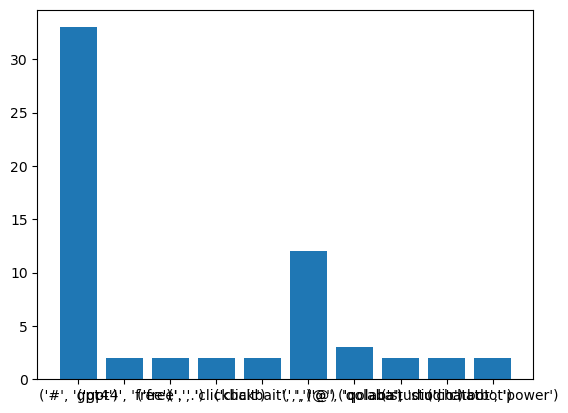

In [252]:
x = [str(w) for w in freq_bigrams.keys()]
y = list(freq_bigrams.values())
Y10=y[:10]
X10=x[:10]
plt.bar(X10, Y10)
plt.show()

# Trigrams

In [253]:
trigrams=list(ngrams(stemming,3))

In [254]:
trigrams

[('#', 'gpt4', 'free'),
 ('gpt4', 'free', '.'),
 ('free', '.', 'clickbait'),
 ('.', 'clickbait', ','),
 ('clickbait', ',', '@'),
 (',', '@', 'qolaba'),
 ('@', 'qolaba', 'studio'),
 ('qolaba', 'studio', 'chatbot'),
 ('studio', 'chatbot', 'power'),
 ('chatbot', 'power', '#'),
 ('power', '#', 'chatgpt4'),
 ('#', 'chatgpt4', 'offer'),
 ('chatgpt4', 'offer', '#'),
 ('offer', '#', 'chatgptplu'),
 ('#', 'chatgptplu', 'free'),
 ('chatgptplu', 'free', '#'),
 ('free', '#', 'aiart'),
 ('#', 'aiart', 'gener'),
 ('aiart', 'gener', '1-click'),
 ('gener', '1-click', '#'),
 ('1-click', '#', 'nft'),
 ('#', 'nft', '#'),
 ('nft', '#', 'mint'),
 ('#', 'mint', 'make'),
 ('mint', 'make', '#'),
 ('make', '#', 'aiartwork'),
 ('#', 'aiartwork', '#'),
 ('aiartwork', '#', 'nft'),
 ('#', 'nft', '#'),
 ('nft', '#', 'openai'),
 ('#', 'openai', '#'),
 ('openai', '#', 'openaichatgpt'),
 ('#', 'openaichatgpt', '#'),
 ('openaichatgpt', '#', 'chatgpt'),
 ('#', 'chatgpt', 'enthusiast'),
 ('chatgpt', 'enthusiast', 'chatgp

In [255]:
freq_trigrams=Counter(trigrams)

In [256]:
freq_trigrams

Counter({('#', 'gpt4', 'free'): 2,
         ('gpt4', 'free', '.'): 2,
         ('free', '.', 'clickbait'): 2,
         ('.', 'clickbait', ','): 2,
         ('clickbait', ',', '@'): 2,
         (',', '@', 'qolaba'): 2,
         ('@', 'qolaba', 'studio'): 2,
         ('qolaba', 'studio', 'chatbot'): 2,
         ('studio', 'chatbot', 'power'): 2,
         ('chatbot', 'power', '#'): 2,
         ('power', '#', 'chatgpt4'): 2,
         ('#', 'chatgpt4', 'offer'): 2,
         ('chatgpt4', 'offer', '#'): 2,
         ('offer', '#', 'chatgptplu'): 2,
         ('#', 'chatgptplu', 'free'): 2,
         ('chatgptplu', 'free', '#'): 2,
         ('free', '#', 'aiart'): 2,
         ('#', 'aiart', 'gener'): 2,
         ('aiart', 'gener', '1-click'): 2,
         ('gener', '1-click', '#'): 2,
         ('1-click', '#', 'nft'): 2,
         ('#', 'nft', '#'): 11,
         ('nft', '#', 'mint'): 2,
         ('#', 'mint', 'make'): 2,
         ('mint', 'make', '#'): 2,
         ('make', '#', 'aiartwork'): 2,
   

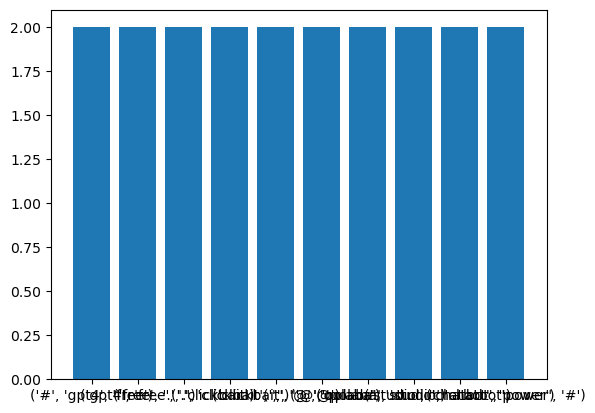

In [257]:
x = [str(w) for w in freq_trigrams.keys()]
y = list(freq_trigrams.values())
Y10=y[:10]
X10=x[:10]
plt.bar(X10, Y10)
plt.show()

# Word Cloud

In [258]:
from wordcloud import WordCloud

In [259]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

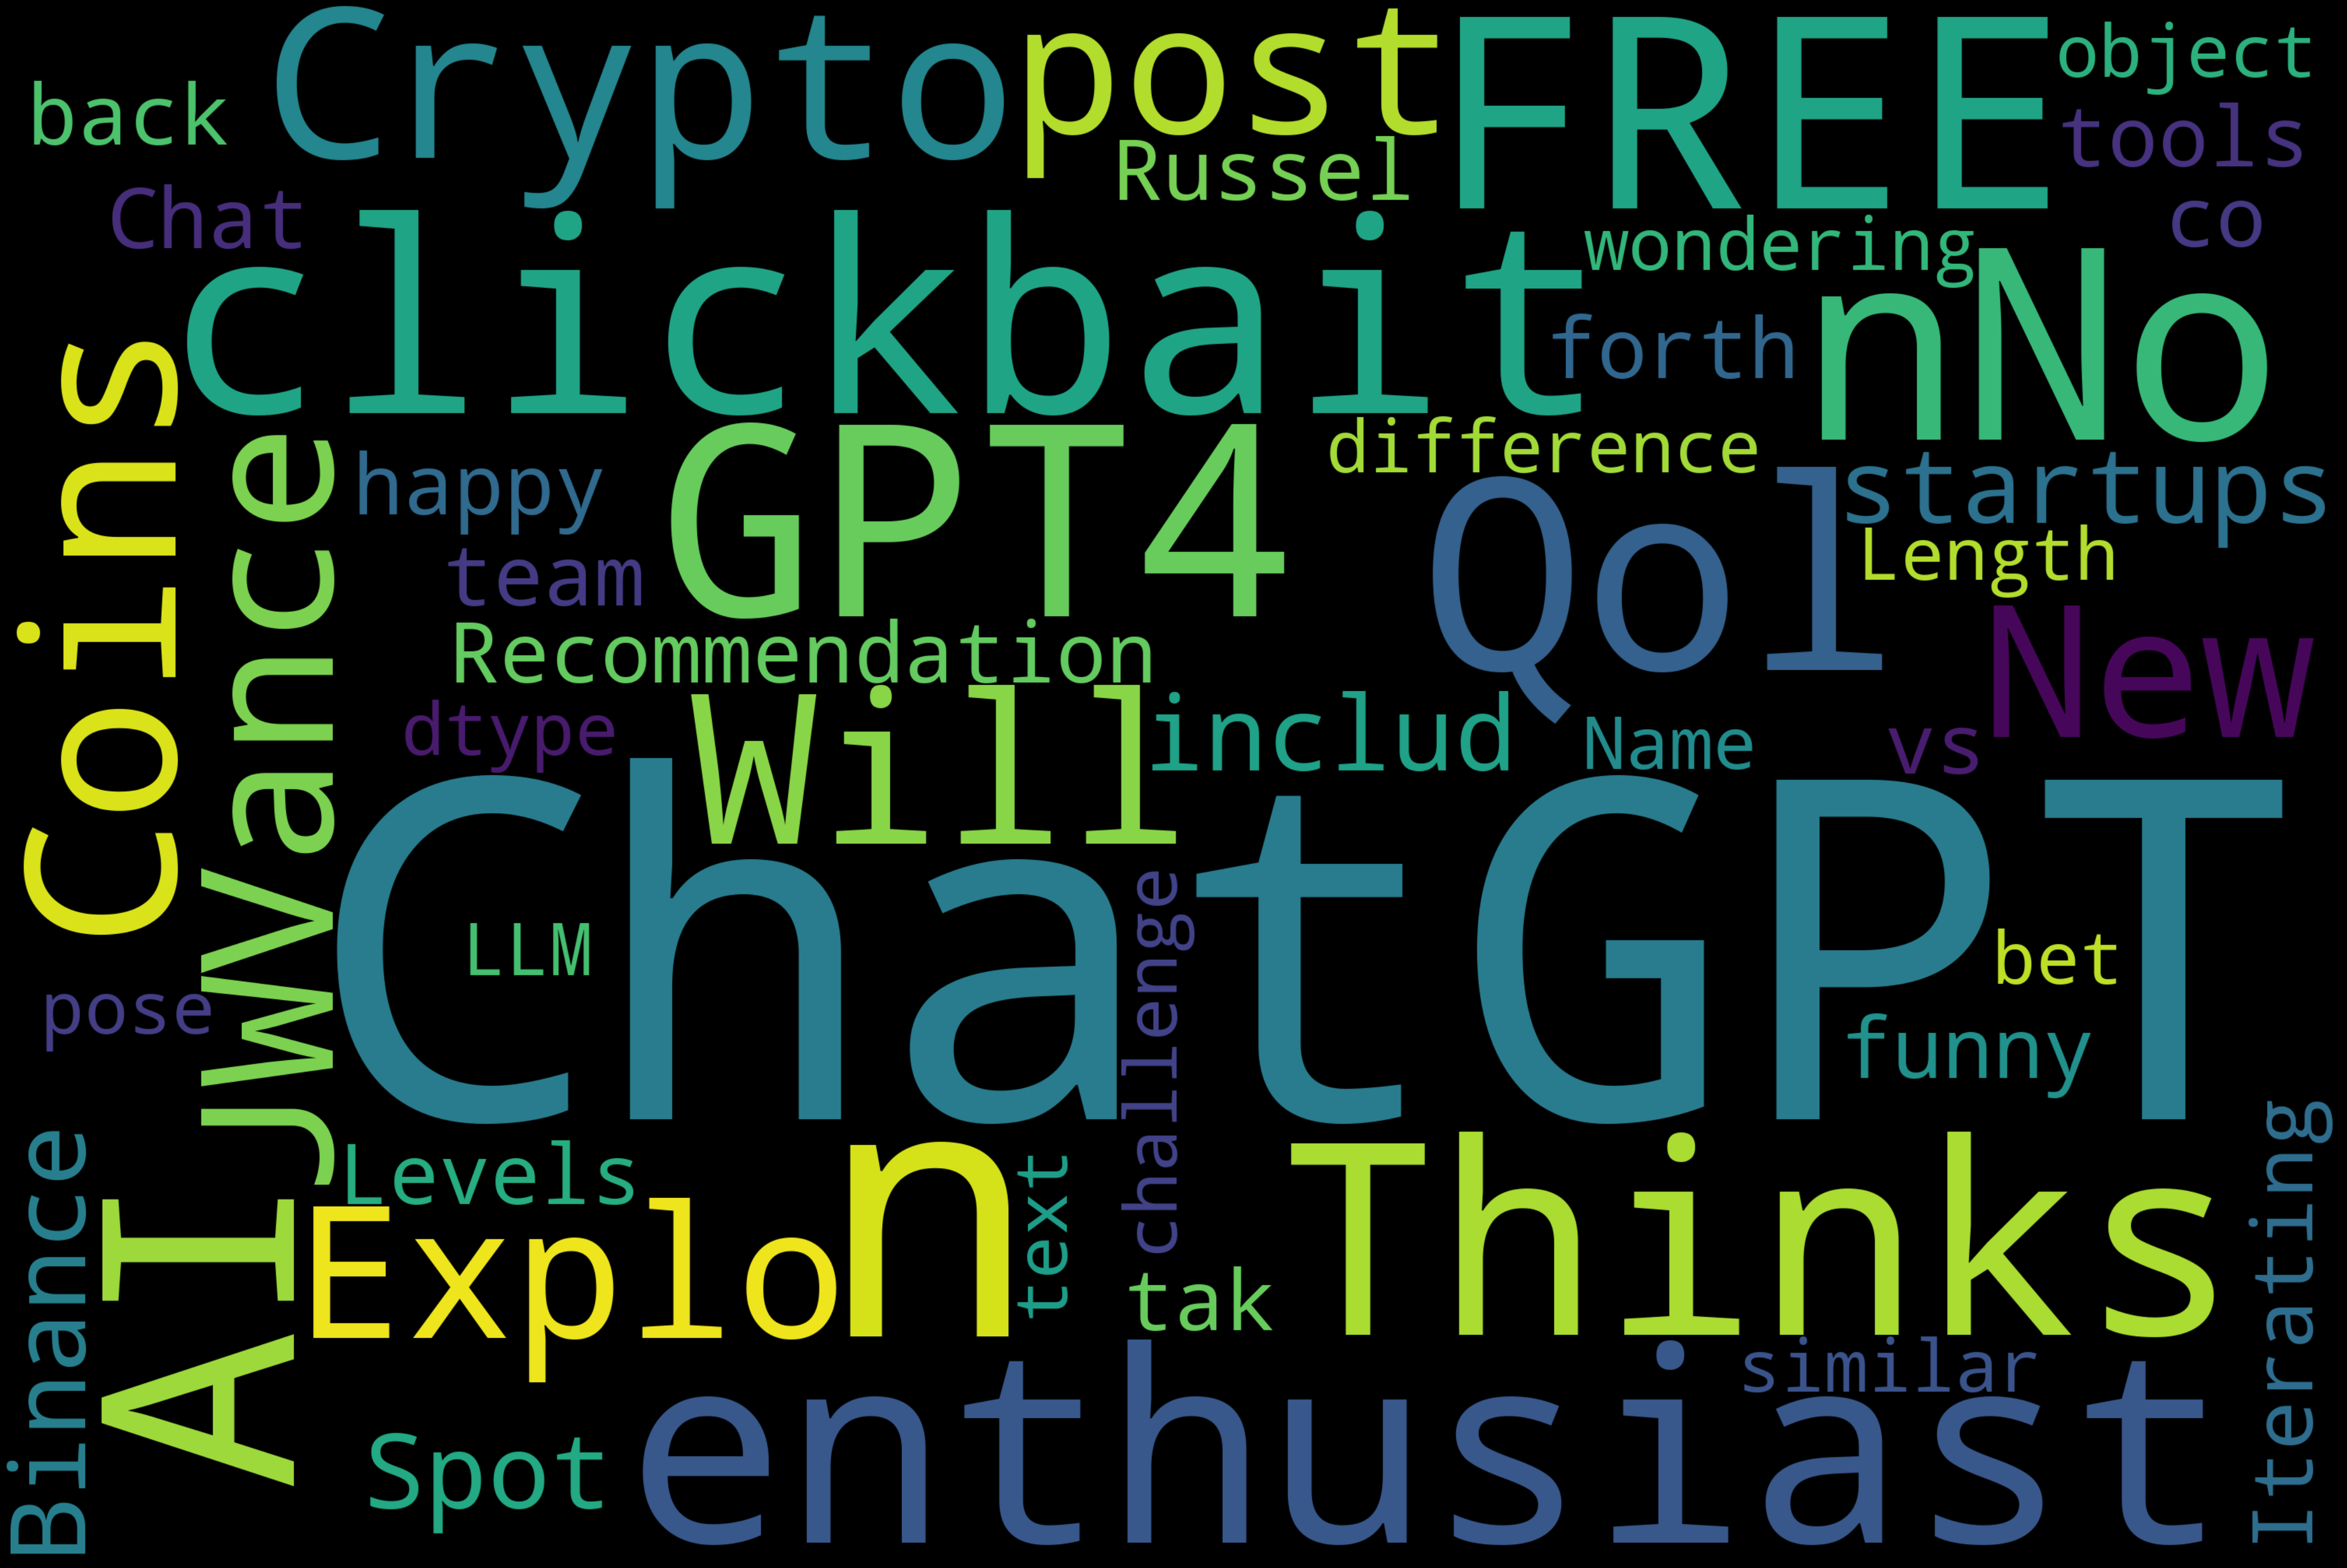

In [ ]:
text =df1.values
generate_word_cloud(sentence)

In [261]:
!pip install emoji
import re
import emoji
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Sentimental Analysis

In [262]:
sw = stopwords.words('english')
ps = PorterStemmer()
wl = WordNetLemmatizer()

def to_lower(text):
    text = text.lower()
    return text

def remove_URL(text):
    text = re.sub(r'https?://\S+','',text)
    return text

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def remove_emji(text):
    text = emoji.demojize(text, delimiters=('', ''))
    return text

def tokenize_stopword_lematize_stemed(text):
    text = word_tokenize(text) 
    word_list = [w for w in text if w not in sw]
    lematized = [wl.lemmatize(w) for w in word_list]
    stemmed = [ps.stem(w) for w in lematized]
    return ' '.join(stemmed)

In [263]:
df1['text'] = df1['text'].apply(to_lower)
df1['text'] = df1['text'].apply(remove_URL)
df1['text'] = df1['text'].apply(remove_punctuation)
df1['text'] = df1['text'].apply(remove_emji)
df1['text'] = df1['text'].apply(tokenize_stopword_lematize_stemed)
df1

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt think 5 crypto coin explod year yahoo ...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new jwvanc post 5 startup includ vcinityinc 1s...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get binanc spot recommend short ticker ghstusd...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show compani logo base websit domain sho...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,use cerberusgpt hologeneticslab simul hologene...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,lucki chatgpt constantli make error point erro...,"Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,hi everyon want share aigener blog chatgpt ope...,"Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,chatgpt set endless stream fear despair closer...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,excit news chatgpt launch plugin store mark co...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [264]:
from textblob import TextBlob

sentiment_textblob = [] #positive --> 1 negtive-->2 netral --> 0

def sentiment_TexBlob(text):
  # Create a TextBlob object
  blob = TextBlob(text)
  # Perform sentiment analysis
  sentiment = blob.sentiment.polarity
  if sentiment == 0.0:
    sentiment_textblob.append(0)
  elif sentiment < 0:
    sentiment_textblob.append(2)
  else:
    sentiment_textblob.append(1)
  

df1['text'].apply(sentiment_TexBlob)

2      None
3      None
4      None
6      None
7      None
       ... 
493    None
494    None
495    None
497    None
498    None
Name: text, Length: 274, dtype: object

In [265]:
df1['sentiment textblob'] = sentiment_textblob
df1.head(3)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment textblob
2,Dan Bruno AI,chatgpt think 5 crypto coin explod year yahoo ...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,0
3,Georgiana Comsa,new jwvanc post 5 startup includ vcinityinc 1s...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,2
4,Bitone Great,get binanc spot recommend short ticker ghstusd...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,2


# Feature Engineering 

In [266]:
df2

0      #GPT4 for FREE. \nNo its not a clickbait, @Qol...
1                                          AI enthusiast
2      ChatGPT Thinks These 5 Crypto Coins Will Explo...
3      New: @JWVance's post about 5 #startups (includ...
4      🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
                             ...                        
495    #ChatGPT set off an endless stream of fear and...
496    ChatGPT is a hot topic; there is no doubt. It ...
497    Exciting news! #chatGPT has launched its Plugi...
498    @Oncrawl Agreed! The #ChatGPT is definitely th...
499    Do you agree whatever is put on the internet d...
Name: text, Length: 496, dtype: object

# Length Of Sentence

In [267]:
len(sen_token)

496

# Number Of Words

In [275]:
unique=[]
for words in filtration:
    if words not in unique:
        unique.append(words)

In [287]:
len(unique)

4329

# Number Of character

In [276]:
#number of words
count=0
for words in unique:
    for i in words:
        count=count+1

In [277]:
count

36286

# Count Spaces

In [285]:
count_1=0
for i in range(0, len(sentence)):
    # Check each char
    # is blank or not
    if sentence[i] == " ":
        count_1 += 1

# Number Of Verbs

In [290]:
verb=[]
pos_tag=nltk.pos_tag(stemming)
for i in pos_tag:
    for pos in i:
        if pos=='VP':
            verb.append(i)

In [294]:
verb

[]

In [292]:
noun=[]
pos_tag=nltk.pos_tag(stemming)
for i in pos_tag:
    for pos in i:
        if pos=='NN':
            noun.append(i)    

In [293]:
noun

[('clickbait', 'NN'),
 ('studio', 'NN'),
 ('chatbot', 'NN'),
 ('power', 'NN'),
 ('chatgpt4', 'NN'),
 ('offer', 'NN'),
 ('gener', 'NN'),
 ('mint', 'NN'),
 ('aiartwork', 'NN'),
 ('chatgpt', 'NN'),
 ('enthusiast', 'NN'),
 ('chatgpt', 'NN'),
 ('coin', 'NN'),
 ('year', 'NN'),
 ('yahoo', 'NN'),
 ('financ', 'NN'),
 ('http', 'NN'),
 ('//t.co/tfodu0qndz', 'NN'),
 ('jwvanc', 'NN'),
 ('post', 'NN'),
 ('startup', 'NN'),
 ('vcinityinc', 'NN'),
 ('startup50', 'NN'),
 ('challeng', 'NN'),
 ('chatgpt', 'NN'),
 ('macro-econom', 'NN'),
 ('pressur', 'NN'),
 ('vc', 'NN'),
 ('fund', 'NN'),
 ('track', 'NN'),
 ('record', 'NN'),
 ('manag', 'NN'),
 ('team', 'NN'),
 ('amp', 'NN'),
 ('growth', 'NN'),
 ('market', 'NN'),
 ('sector', 'NN'),
 ('http', 'NN'),
 ('🚨get', 'NN'),
 ('binanc', 'NN'),
 ('spot💰', 'NN'),
 ('recommend', 'NN'),
 ('🔴', 'NN'),
 ('ticker', 'NN'),
 ('time', 'NN'),
 ('interv', 'NN'),
 ('price', 'NN'),
 ('rsi', 'NN'),
 ('power', 'NN'),
 ('저스트', 'NN'),
 ('gon', 'NN'),
 ('👇wait', 'NN'),
 ('👇short', 'NN'

In [295]:
len(noun)

4729

# Vectorization 

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [309]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['text'], df1['sentiment textblob'])

# Countvectorizer

In [316]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
vec = cv.fit(df1['text'])

cv_vec_train = vec.transform(x_train)
cv_vec_test = vec.transform(x_test)

# TF-IDF

In [324]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
tfidf.fit(df1['text'])

tfidf_vec_train = tfidf.transform(x_train)
tfidf_vec_test = tfidf.transform(x_test)

# Word2Vec

In [326]:
# Apply Doc2Vec vectorization
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Convert the corpus to TaggedDocuments
tagged_corpus = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(df1['text'])]

# Train the Doc2Vec model
model = Doc2Vec(tagged_corpus, vector_size=50, window=2, min_count=1, workers=4, epochs=100)

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report